In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-targets.txt'

VOCAB_SIZE = 2500

In [4]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [5]:
X_test.dot(prob_token_spam)

array([0.43077878, 0.14572918, 0.14635551, ..., 0.57105549, 0.0908913 ,
       0.26089655])

In [6]:
PROB_SPAM = 0.3116

In [7]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens))+np.log(PROB_SPAM)
joint_log_spam[:5]

array([24.27580867,  2.15999942, 20.59075715, 17.74776262, 20.50984493])

In [8]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)
joint_log_ham

array([-6.09682485e+01, -1.10090532e+01, -3.79678354e+01, ...,
        6.09843402e+01, -5.86285468e-02,  2.44574161e+01])

In [9]:
joint_log_ham

array([-6.09682485e+01, -1.10090532e+01, -3.79678354e+01, ...,
        6.09843402e+01, -5.86285468e-02,  2.44574161e+01])

In [10]:
predictions = joint_log_spam > joint_log_ham
predictions*1

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
joint_log_spam = X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)
predictions = joint_log_spam > joint_log_ham
predictions*1

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
linedata = np.linspace(start=-14000, stop=1, num=1000)

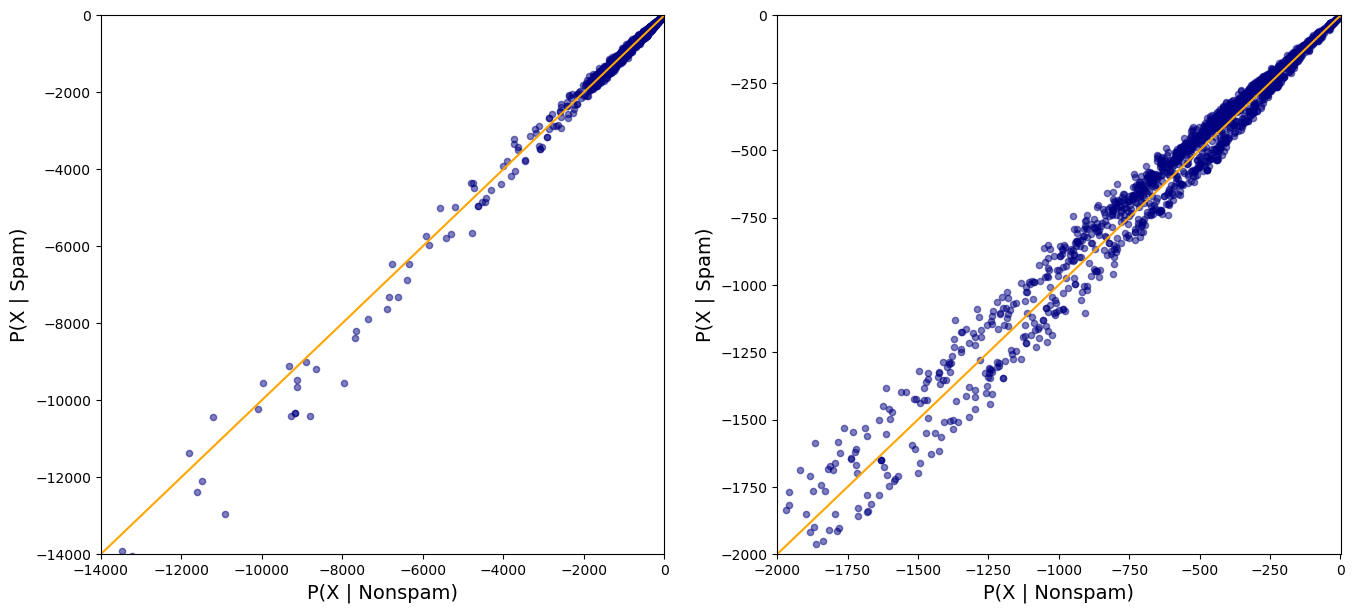

In [14]:
plt.figure(figsize=[16, 7])
plt.subplot(1, 2, 1)
plt.scatter(joint_log_spam, joint_log_ham, color='navy', s=20, alpha=0.5)
plt.plot(linedata, linedata, color='orange')
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.subplot(1, 2, 2)
plt.scatter(joint_log_spam, joint_log_ham, color='navy', s=20, alpha=0.5)
plt.plot(linedata, linedata, color='orange')
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.show()

In [15]:
sns.set_style('whitegrid')
labels = 'Actual Category'
summary_df = pd.DataFrame({xaxis_label: joint_log_ham, yaxis_label: joint_log_spam, labels:y_test})


<Figure size 1600x900 with 0 Axes>

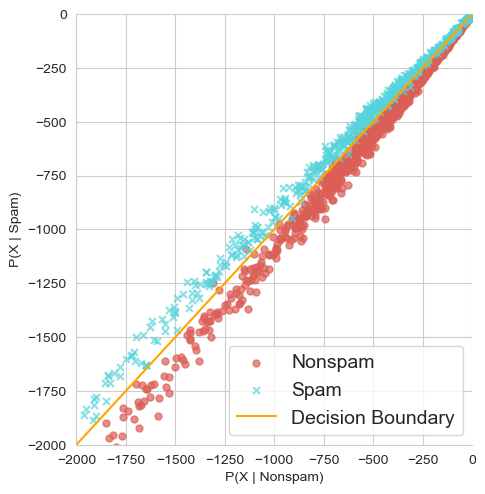

In [16]:
plt.figure(figsize=[16, 9])
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.7, 's':25}, fit_reg=False, 
           legend=False,
           markers=['o', 'x'], hue=labels, palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
Decision_boundary = plt.plot(linedata, linedata, color='orange')
plt.legend( ('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)
plt.show()

<Figure size 1600x900 with 0 Axes>

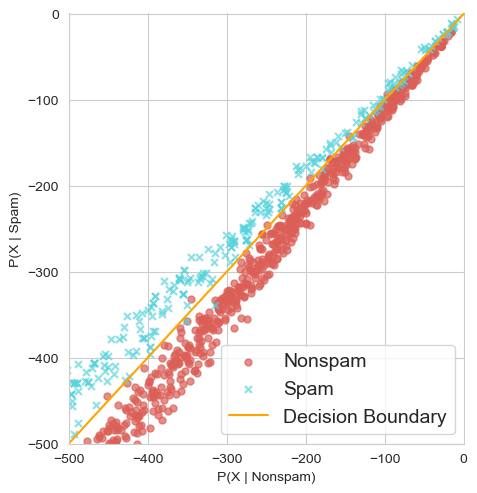

In [17]:
plt.figure(figsize=[16, 9])
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.7, 's':25}, fit_reg=False, 
           legend=False,
           markers=['o', 'x'], hue=labels, palette='hls')
plt.plot(linedata, linedata, color='orange')
plt.xlim([-500, 1])
plt.ylim([-500, 1])
plt.legend( ('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)
plt.show()

In [19]:
true_pos = (y_test==1) & (predictions==1)
true_pos.sum()

569

In [24]:
false_pos = (y_test==0) & (predictions==1)
false_pos.sum()

19

In [25]:
false_neg = (y_test==1) & (predictions==0)
false_neg.sum()

20

In [40]:
recall_score = true_pos.sum()/(true_pos.sum()+false_neg.sum())
print('{:.2%}'.format(recall_score))

96.60%


In [44]:
precision = true_pos.sum()/(true_pos.sum()+false_pos.sum())
print('{:.3}'.format(recall_score))

0.968


In [48]:
f1_score = 2*(precision*recall_score)/(precision+recall_score)
print('{:.4}'.format(f1_score))

0.9677
